In [3]:
import sys
import snap
import numpy as np
import tqdm
from random import sample, shuffle
from matplotlib import pyplot as plt
import networkx as nx
sys.path.append('../src/')
import util
import util_data
reload(util)
reload(util_data)

<module 'util_data' from '../src/util_data.pyc'>

In [2]:
def load_graph(nm):
    if nm =='LS':
        return snap.LoadEdgeList(snap.PNGraph, "../data/Edgelist_v2/LS174T_clean_EdgesList.txt", 0, 1)
    elif nm=='SW':
        return snap.LoadEdgeList(snap.PNGraph, "../data/Edgelist_v2/SW1222_clean_EdgesList.txt", 0, 1)
    else:
        print('ERROR LOADING')
G_LS174t = load_graph('LS')
G_SW1222 = load_graph('SW')
G_LS174t_nodes = G_LS174t.GetNodes()
G_SW1222_nodes = G_SW1222.GetNodes()

In [38]:
def get_nbrs(g, n, hops=2):
    nbrs = set([n])
    newnbrs = set([n])
    toadd = set()
    for _ in range(hops):
        for nbr in newnbrs:
            for e in g.edges(nbr):
                if e[1] not in nbrs and e[1] not in toadd:
                    toadd.add(e[1])
            for e in g.in_edges(nbr):
                if e[1] not in nbrs and e[1] not in toadd:
                    toadd.add(e[1])
        nbrs = nbrs.union(toadd)
        newnbrs = toadd
        toadd = set()
    return nbrs

In [20]:
nxLS = nx.read_edgelist("../data/Edgelist_v2/LS174T_clean_EdgesList.txt", create_using=nx.DiGraph(), nodetype=int)

[16320, 16321, 16293, 16289, 16368, 16369, 16373, 16055, 16282, 16442, 16319]


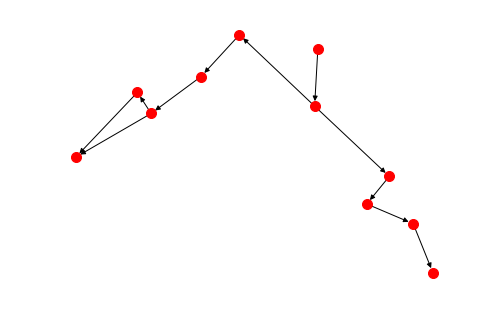

In [87]:
sg = nxLS.subgraph(get_nbrs(nxLS, 16055, 5))
print(sg.nodes)
nx.draw(sg, node_size=100)